# Problème: minimisation de l'énergie de Dirichlet sous contraintes

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\Vert#1\Vert}$
Dans toute la suite, on supposera que $n=30$. La solution du problème de minimisation (P) a été calculée et est stockée dans le vecteur xsol (ce qui permettra d'étudier la vitesse de convergence des deux algorithmes considérés):

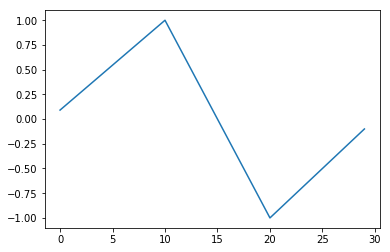

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 30
i1 = 10
i2 = 20
t = np.linspace(0,1,n)

# solution exacte du problème
xsol = np.zeros(30)
xsol[0:11] = np.linspace(0,1,12)[1:]
xsol[10:21] = np.linspace(1,-1,11)
xsol[20:30] = np.linspace(-1,0,11)[:-1]
plt.plot(xsol)

## Première approche: gradient projeté

**QN1.** Calculer la matrice $G$ décrite dans le sujet. Écrire une fonction calculant la projection d'un vecteur $x
\in \Rsp^n$ sur le convexe $K$.

In [10]:
def projK(z):
    p = z.copy()
    p[i1] = max(z[i1],1)
    p[i2] = min(z[i2],-1)
    return p

G = (-np.diag(np.ones(n),-1) + np.diag(np.ones(n+1),0))[:,0:-1]
#Q = 2*np.diag(np.ones(n),0) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
Q = np.dot(G.T,G)


**QN2** Implémenter l'algorithme de gradient projeté décrit dans la première partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $0.5$ 
- On effectuera $N = 30000$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

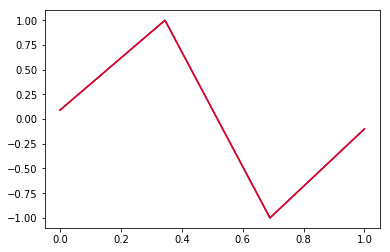

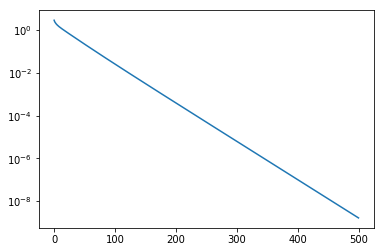

In [11]:
tau = .5
niter = 500
x = np.zeros(n)
e = np.zeros(niter)
for i in range(niter):
    d = - np.dot(Q,x)
    x = projK(x + tau * d)
    e[i] = np.linalg.norm(x-xsol)
    
plt.plot(t,x,'b')
plt.plot(t,xsol,'r')

plt.figure()
plt.semilogy(e)

**QN3** Illustrer l'instabilité de l'algorithme pour $\tau > .5$.

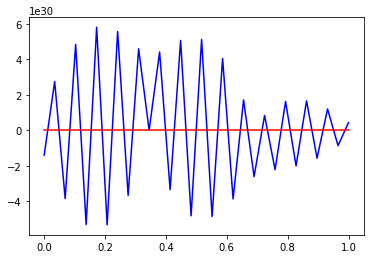

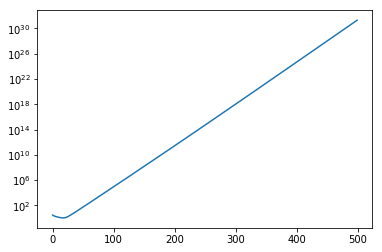

In [12]:
tau = .55
niter = 500
x = np.zeros(n)
e = np.zeros(niter)
for i in range(niter):
    d = - np.dot(Q,x)
    x = projK(x + tau * d)
    e[i] = np.linalg.norm(x-xsol)
    
plt.plot(t,x,'b')
plt.plot(t,xsol,'r')

plt.figure()
plt.semilogy(e)

## Deuxième approche: dualité algorithme d'Uzawa

**QN4.** Calculer la matrice $B$ décrite dans le sujet. Écrire une fonction projP calculant la projection d'un vecteur $\lambda \in \Rsp^2$ sur $\Rsp_+^{2}$.

In [13]:
B = np.zeros((2,n))
B[0,i1] = -1
B[1,i2] = 1

def projP(z):
    return np.maximum(z,0)

**QN5** Implémenter l'algorithme d'Uzawa décrit dans la deuxième partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $1/\Lambda,$ où $\Lambda$ est la plus grande valeur propre de la matrice 
$R  = B(G^T G)^{-1} B^T$ (on rappelle *np.linalg.eigh(B)[0]* permet de calculer les valeurs propres d'une matrice symétrique B)..
- On effectuera $N = 80$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

10.4875347654105


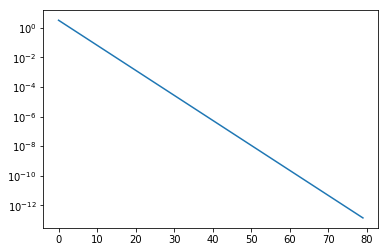

In [24]:
R = np.dot(B,np.dot(np.linalg.inv(Q),B.T))
Lambda = np.max(np.linalg.eigh(R)[0])
print(Lambda)


tau = 1/Lambda
niter = 80
e = np.zeros(niter)
ld = np.zeros(2)
for i in range(niter):
    x = - np.linalg.solve(Q,np.dot(B.T,ld))
    d = np.dot(B,x) + np.array([1, 1])
    ld = projP(ld + tau*d)
    e[i] = np.linalg.norm(x-xsol)
    
plt.figure()
plt.semilogy(e)